In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trabalho_ic_aplicada.dataset_faces import build_face_dataset
from trabalho_ic_aplicada.models.pca_np import PCA_np
import imageio.v3 as iio

2025-08-29 12:43:18.340 | INFO     | trabalho_ic_aplicada.config:<module>:11 - PROJ_ROOT path is: /home/apo-note/Documents/Github/Trabalhos_IC_Aplicada


In [2]:
img = iio.imread("/home/apo-note/Documents/Github/Trabalhos_IC_Aplicada/data/raw/Kit_projeto_FACES/subject01.centerlight")

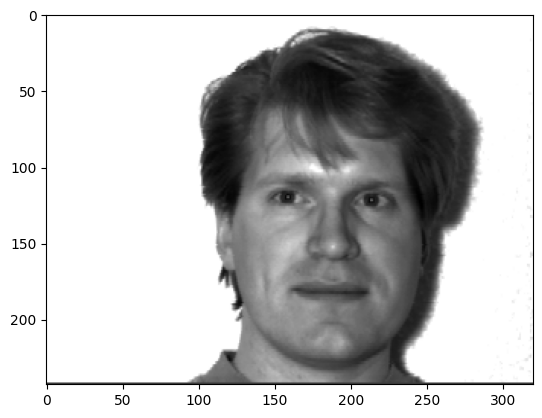

In [3]:
plt.imshow(img[0], cmap='gray')

In [4]:

# 1. Carregar dados e ajustar PCA
img_h, img_w = (30, 30)
X, y, _ = build_face_dataset("/home/apo-note/Documents/Github/Trabalhos_IC_Aplicada/data/raw/Kit_projeto_FACES", size=(img_h, img_w), load_intruders=True)

In [22]:
X[0,:].shape, X[20].shape, y[0], y[20]

((900,), (900,), np.int64(0), np.int64(1))

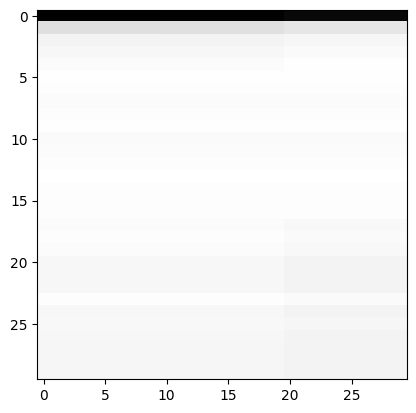

In [23]:
plt.imshow(X[0,:].reshape((img_h, img_w)), cmap='gray')

In [7]:
pca = PCA_np()
X_pca = pca.fit(X)

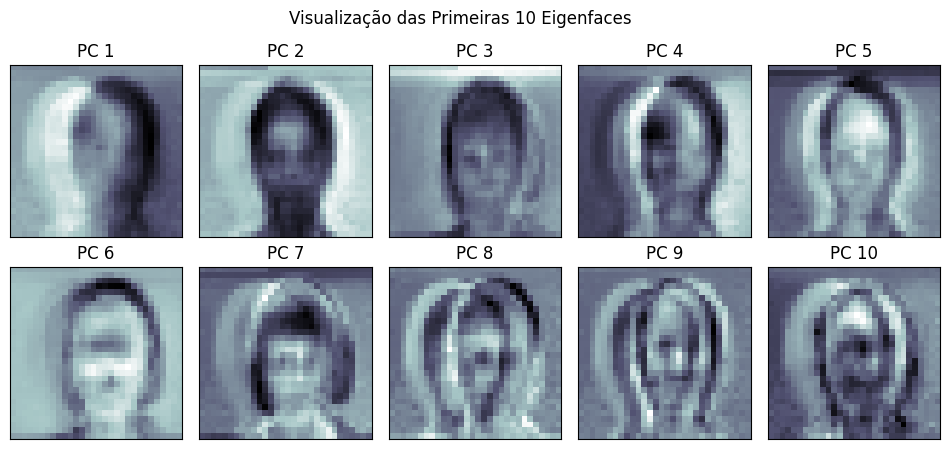

In [16]:

# 2. Plotar as primeiras eigenfaces
def plot_eigenfaces(pca_model, h, w, n_eigenfaces=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        if i < n_eigenfaces:
            eigenface = pca_model.Vt_[i, :].reshape(h, w)
            ax.imshow(eigenface, cmap='bone')
            ax.set_title(f"PC {i+1}")
    plt.suptitle("Visualização das Primeiras 10 Eigenfaces")
    plt.savefig("/home/apo-note/Documents/Github/Trabalhos_IC_Aplicada/results/TC2/eigenfaces_visualization.png")
    plt.show()

plot_eigenfaces(X_pca, img_h, img_w)